In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [124]:
df = pd.read_csv("data.csv")
# Drop columns ending in "prev" if any exist
cols_to_drop = [col for col in df.columns if col.endswith("prev")]
if cols_to_drop:
  df = df.drop(columns=cols_to_drop)


In [125]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Create 'Year' column
df['Year'] = df['Date'].dt.year
print(df.head())


        Date  Adj Close   Close    High    Low    Open   Volume  Year
0 1994-01-03  22.791452  32.000  32.000  31.75  31.750   2500.0  1994
1 1994-01-04  22.613386  31.750  32.000  31.75  31.875  54600.0  1994
2 1994-01-05  22.880474  32.125  32.375  32.00  32.000  18600.0  1994
3 1994-01-06  22.969505  32.250  32.375  32.25  32.250   9300.0  1994
4 1994-01-07  23.503677  33.000  33.000  32.75  32.750  15700.0  1994


In [126]:
  print(df.head())
  print(df.describe())


        Date  Adj Close   Close    High    Low    Open   Volume  Year
0 1994-01-03  22.791452  32.000  32.000  31.75  31.750   2500.0  1994
1 1994-01-04  22.613386  31.750  32.000  31.75  31.875  54600.0  1994
2 1994-01-05  22.880474  32.125  32.375  32.00  32.000  18600.0  1994
3 1994-01-06  22.969505  32.250  32.375  32.25  32.250   9300.0  1994
4 1994-01-07  23.503677  33.000  33.000  32.75  32.750  15700.0  1994
                                Date    Adj Close        Close         High  \
count                           7770  7712.000000  7686.000000  7709.000000   
mean   2009-06-26 14:46:14.362934272    86.834105    96.879555    97.421052   
min              1994-01-03 00:00:00    22.613386    31.750000    32.000000   
25%              2001-09-21 18:00:00    47.348308    62.400002    62.889999   
50%              2009-06-29 12:00:00    72.719383    88.275002    88.910004   
75%              2017-03-29 18:00:00   119.489122   124.385000   124.980003   
max              2024-12-27

In [129]:
# the number of records with null values or 0 in dataset for each column
for col in df.columns:
    null_count = df[col].isnull().sum()
    zero_count = (df[col] == 0).sum()
    print(f"'{col}': Null values - {null_count}, Zero values - {zero_count}")

'Date': Null values - 0, Zero values - 0
'Adj Close': Null values - 58, Zero values - 0
'Close': Null values - 84, Zero values - 0
'High': Null values - 61, Zero values - 0
'Low': Null values - 88, Zero values - 0
'Open': Null values - 64, Zero values - 0
'Volume': Null values - 100, Zero values - 0
'Year': Null values - 0, Zero values - 0


In [130]:
# Calculate the count of records with at least one null value
records_with_nulls = df.isnull().any(axis=1).sum()
print(f"Total number of records ", len(df))
print(f"Number of records with at least one null value: {records_with_nulls}")

# Calculate the percentage of records with at least one null value
percentage_with_nulls = (records_with_nulls / len(df)) * 100
print(f"Percentage of records with at least one null value: {percentage_with_nulls:.2f}%")


Total number of records  7770
Number of records with at least one null value: 446
Percentage of records with at least one null value: 5.74%


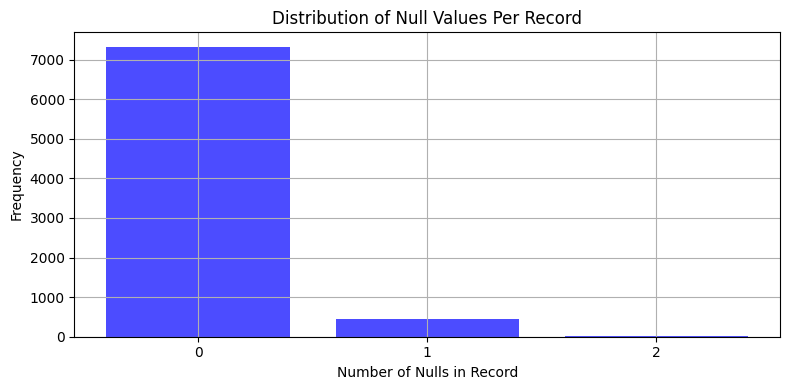


Exact frequency of records with specific null counts:
Records with 0 null(s): 7324 record(s)
Records with 1 null(s): 437 record(s)
Records with 2 null(s): 9 record(s)


In [132]:
def plot_null_value_distribution(df):
    """
    Plots the distribution of the number of null values per record in the dataset.

    Parameters:
    -----------
    df : pd.DataFrame
        The DataFrame containing the dataset.

    Returns:
    --------
    None
    """

    # 1. Calculate the number of nulls per record (row)
    df['Null_Count'] = df.isnull().sum(axis=1)

    # 2. Calculate the frequency of each null count
    null_count_distribution = df['Null_Count'].value_counts().sort_index()

    # 3. Plot the frequency distribution as a bar chart
    plt.figure(figsize=(8, 4))
    plt.bar(null_count_distribution.index, null_count_distribution.values, color='blue', alpha=0.7)
    plt.xlabel('Number of Nulls in Record')
    plt.ylabel('Frequency')
    plt.title('Distribution of Null Values Per Record')
    plt.xticks(range(int(min(null_count_distribution.index)), int(max(null_count_distribution.index)) + 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 4. Print exact frequency of null counts
    print("\nExact frequency of records with specific null counts:")
    for null_count, frequency in null_count_distribution.items():
        print(f"Records with {null_count} null(s): {frequency} record(s)")

plot_null_value_distribution(df)


Adj Close     58
Close         84
High          61
Low           88
Open          64
Volume       100
dtype: int64


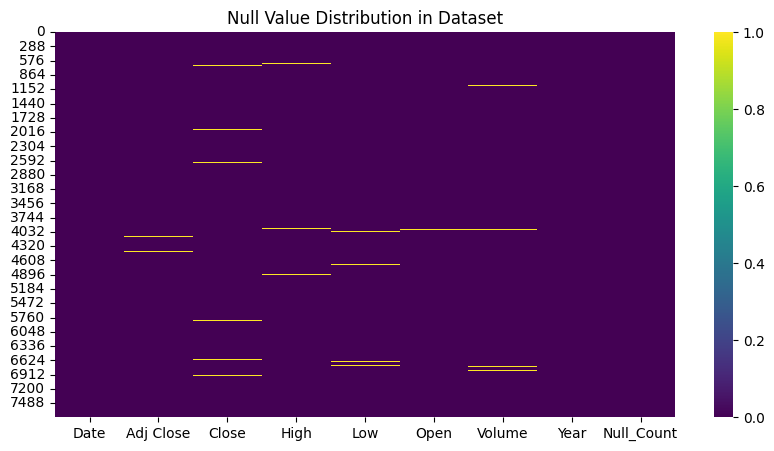

In [133]:
# Check for null values in the dataset
null_summary = df.isnull().sum()
print(null_summary[null_summary > 0])

# Visualize null distribution
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Null Value Distribution in Dataset')
plt.show()


In [134]:
# Remove rows with more than one or more null values
df_cleaned = df.dropna(thresh=len(df.columns) - 0)  # Keep rows with at least N non-null values

# Print the number of rows before and after cleaning
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after removing rows with more than 0 null values: {len(df_cleaned)}")

Original number of rows: 7770
Number of rows after removing rows with more than 0 null values: 7324


In [135]:
# Drop the 'Nullcount' column if it exists
if 'Null_Count' in df.columns:
    df = df.drop('Null_Count', axis=1)
    print("Column 'Null_Count' dropped successfully.")

print(df.head())

Column 'Null_Count' dropped successfully.
        Date  Adj Close   Close    High    Low    Open   Volume  Year
0 1994-01-03  22.791452  32.000  32.000  31.75  31.750   2500.0  1994
1 1994-01-04  22.613386  31.750  32.000  31.75  31.875  54600.0  1994
2 1994-01-05  22.880474  32.125  32.375  32.00  32.000  18600.0  1994
3 1994-01-06  22.969505  32.250  32.375  32.25  32.250   9300.0  1994
4 1994-01-07  23.503677  33.000  33.000  32.75  32.750  15700.0  1994


In [136]:
# Save the DataFrame to a CSV file, excluding the 'Null_Count' column and 'Year'
df_cleaned.drop(columns=['Year'], errors='ignore').to_csv('cleaned_data.csv', index=False)

In [137]:
df['Close_prev'] = df['Close'].shift(1)
df['Date_prev'] = df['Date'].shift(1)

In [138]:
df = df.iloc[1:]
# Now df contains all rows except the first one
print(df.head())

        Date  Adj Close   Close    High     Low    Open   Volume  Year  \
1 1994-01-04  22.613386  31.750  32.000  31.750  31.875  54600.0  1994   
2 1994-01-05  22.880474  32.125  32.375  32.000  32.000  18600.0  1994   
3 1994-01-06  22.969505  32.250  32.375  32.250  32.250   9300.0  1994   
4 1994-01-07  23.503677  33.000  33.000  32.750  32.750  15700.0  1994   
5 1994-01-10  23.503677  33.000  33.000  32.875  33.000  14400.0  1994   

   Close_prev  Date_prev  
1      32.000 1994-01-03  
2      31.750 1994-01-04  
3      32.125 1994-01-05  
4      32.250 1994-01-06  
5      33.000 1994-01-07  


In [139]:
# the number of records with null values or 0 in dataset for each column
for col in df.columns:
    null_count = df[col].isnull().sum()
    zero_count = (df[col] == 0).sum()
    print(f"'{col}': Null values - {null_count}, Zero values - {zero_count}")

'Date': Null values - 0, Zero values - 0
'Adj Close': Null values - 58, Zero values - 0
'Close': Null values - 84, Zero values - 0
'High': Null values - 61, Zero values - 0
'Low': Null values - 88, Zero values - 0
'Open': Null values - 64, Zero values - 0
'Volume': Null values - 100, Zero values - 0
'Year': Null values - 0, Zero values - 0
'Close_prev': Null values - 84, Zero values - 0
'Date_prev': Null values - 0, Zero values - 0


In [140]:
# Calculate the time difference between consecutive dates
df.loc[:, 'Time_Difference'] = df['Date'].diff().dt.days

# Identify gaps
gaps = df[df['Time_Difference'] > 1]

# Print the gap information
print("Gaps in the dataset:")
print(gaps[['Date', 'Time_Difference']])

# Calculate the total number of gaps
total_gaps = len(gaps)
print(f"\nTotal number of gaps: {total_gaps}")


# Calculate total magnitude of all gaps
total_magnitude = gaps['Time_Difference'].sum() - len(gaps) # Subtract the number of gaps because each gap represents a missing date.
# print(f"\nTotal magnitude of all gaps: {total_magnitude}")


Gaps in the dataset:
           Date  Time_Difference
5    1994-01-10              3.0
10   1994-01-17              3.0
15   1994-01-24              3.0
20   1994-01-31              3.0
25   1994-02-07              3.0
...         ...              ...
7751 2024-12-02              3.0
7756 2024-12-09              3.0
7761 2024-12-16              3.0
7766 2024-12-23              3.0
7768 2024-12-26              2.0

[1686 rows x 2 columns]

Total number of gaps: 1686


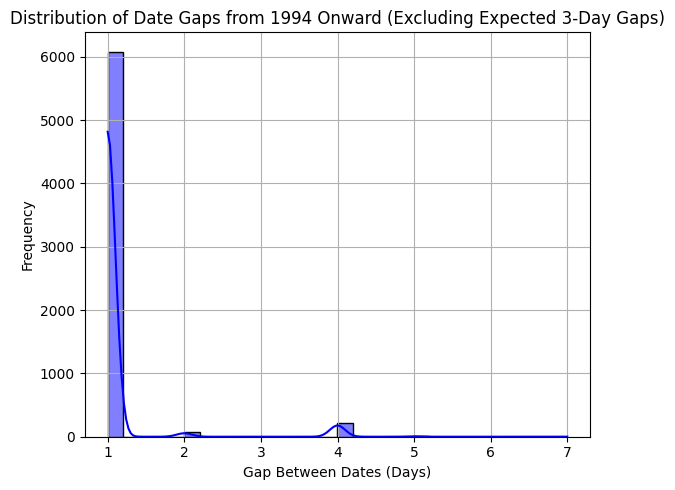


Exact counts of each date gap size (excluding Friday-Monday 3-day gaps):
Gap of 1.0 day(s): 6082 record(s)
Gap of 2.0 day(s): 69 record(s)
Gap of 3.0 day(s): 1 record(s)
Gap of 4.0 day(s): 224 record(s)
Gap of 5.0 day(s): 8 record(s)
Gap of 7.0 day(s): 1 record(s)

Summary statistics for date gaps:
count    6385.000000
mean        1.122318
std         0.581334
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         7.000000
Name: Date_Gap, dtype: float64


In [141]:
def plot_and_count_date_gaps(df, date_column='Date', start_year=2017):
    """
    Plots the distribution of date gaps and prints exact counts of each gap size,
    ignoring 3-day gaps between Fridays and Mondays.

    Parameters:
    -----------
    df : pd.DataFrame
        The DataFrame containing the date column.
    date_column : str, default 'Date'
        The name of the date column to analyze.
    start_year : int, default 2017
        The start year to filter records.

    Returns:
    --------
    None
    """

    # 1. Filter and sort the DataFrame
    df_filtered = df[df[date_column].dt.year >= start_year].copy()
    df_filtered = df_filtered.dropna(subset=[date_column]).sort_values(by=date_column)

    # 2. Calculate the gap in days between consecutive dates
    df_filtered['Date_Gap'] = df_filtered[date_column].diff().dt.days

    # 3. Identify the day of the week (0=Monday, 4=Friday)
    df_filtered['DayOfWeek'] = df_filtered[date_column].dt.weekday

    # 4. Exclude 3-day gaps from Friday to Monday
    df_filtered['PreviousDay'] = df_filtered['DayOfWeek'].shift(1)

    # Condition to filter out specific 3-day weekend gaps (Friday to Monday)
    valid_gaps = ~(
        (df_filtered['Date_Gap'] == 3) &
        (df_filtered['PreviousDay'] == 4) &  # Previous day is Friday
        (df_filtered['DayOfWeek'] == 0)      # Current day is Monday
    )

    df_valid_gaps = df_filtered[valid_gaps].copy()

    # 5. Plot the distribution of date gaps
    plt.figure(figsize=(6, 5))
    sns.histplot(df_valid_gaps['Date_Gap'].dropna(), bins=30, kde=True, color='blue')
    plt.xlabel('Gap Between Dates (Days)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Date Gaps from {start_year} Onward (Excluding Expected 3-Day Gaps)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 6. Count the exact occurrences of each gap size
    gap_counts = df_valid_gaps['Date_Gap'].value_counts().sort_index()

    # 7. Print the exact counts of each gap size
    print("\nExact counts of each date gap size (excluding Friday-Monday 3-day gaps):")
    for gap, count in gap_counts.items():
        print(f"Gap of {gap} day(s): {count} record(s)")

    # 8. Print summary statistics of the gaps
    print("\nSummary statistics for date gaps:")
    print(df_valid_gaps['Date_Gap'].describe())

# Example usage:
plot_and_count_date_gaps(df, date_column='Date', start_year=1994)


In [143]:
def get_specific_and_other_3day_gaps(df, date_column='Date', start_year=1994, end_year=None):
    """
    Identifies 3-day gaps specifically between Friday and Monday,
    and counts 3-day gaps that do not fit this pattern.

    Parameters:
    -----------
    df : pd.DataFrame
        The DataFrame containing the date column.
    date_column : str, default 'Date'
        The name of the date column to analyze.
    start_year : int, default 2017
        The start year to filter records.
    end_year : int, optional
        The end year to filter records. Defaults to the maximum year in the dataset.

    Returns:
    --------
    None
    """

    # 1. Filter the DataFrame by the start and end year
    if end_year is None:
        end_year = int(df[date_column].dt.year.max())

    df_filtered = df[(df[date_column].dt.year >= start_year) & (df[date_column].dt.year <= end_year)].copy()
    df_filtered = df_filtered.dropna(subset=[date_column]).sort_values(by=date_column)

    # 2. Calculate the gap in days between consecutive dates
    df_filtered['Date_Gap'] = df_filtered[date_column].diff().dt.days

    # 3. Identify the day of the week (0=Monday, 4=Friday)
    df_filtered['DayOfWeek'] = df_filtered[date_column].dt.weekday
    df_filtered['PreviousDay'] = df_filtered['DayOfWeek'].shift(1)

    # 4. Filter for specific 3-day gaps from Friday to Monday
    friday_to_monday_gaps = df_filtered[
        (df_filtered['Date_Gap'] == 3) &
        (df_filtered['PreviousDay'] == 4) &  # Previous day is Friday
        (df_filtered['DayOfWeek'] == 0)      # Current day is Monday
    ]

    # 5. Count 3-day gaps not fitting the Friday-Monday pattern
    other_3day_gaps = df_filtered[
        (df_filtered['Date_Gap'] == 3) &
        ~(
            (df_filtered['PreviousDay'] == 4) &
            (df_filtered['DayOfWeek'] == 0)
        )
    ]

    # 6. Output the results
    print(f"\nNumber of 3-day gaps from Friday to Monday: {len(friday_to_monday_gaps)}")
    print(f"Number of 3-day gaps not from Friday to Monday: {len(other_3day_gaps)}")

    # 7. Display the specific gaps
    print("\nSpecific 3-day gaps from Friday to Monday:")
    print(friday_to_monday_gaps[[date_column, 'Date_Gap', 'PreviousDay', 'DayOfWeek']])

    print("\nOther 3-day gaps (not Friday to Monday):")
    print(other_3day_gaps[[date_column, 'Date_Gap', 'PreviousDay', 'DayOfWeek']])

get_specific_and_other_3day_gaps(df, date_column='Date', start_year=1994, end_year=2025)



Number of 3-day gaps from Friday to Monday: 1383
Number of 3-day gaps not from Friday to Monday: 1

Specific 3-day gaps from Friday to Monday:
           Date  Date_Gap  PreviousDay  DayOfWeek
5    1994-01-10       3.0          4.0          0
10   1994-01-17       3.0          4.0          0
15   1994-01-24       3.0          4.0          0
20   1994-01-31       3.0          4.0          0
25   1994-02-07       3.0          4.0          0
...         ...       ...          ...        ...
7743 2024-11-18       3.0          4.0          0
7751 2024-12-02       3.0          4.0          0
7756 2024-12-09       3.0          4.0          0
7761 2024-12-16       3.0          4.0          0
7766 2024-12-23       3.0          4.0          0

[1383 rows x 4 columns]

Other 3-day gaps (not Friday to Monday):
           Date  Date_Gap  PreviousDay  DayOfWeek
4643 2012-07-05       3.0          0.0          3
